In [2]:
import tensorflow as tf 
import numpy as np

fashion_mnist=tf.keras.datasets.fashion_mnist


(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankleboot']
trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4965 - acc: 0.8244 - val_loss: 0.4278 - val_acc: 0.8466
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3749 - acc: 0.8645 - val_loss: 0.4057 - val_acc: 0.8493
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3400 - acc: 0.8760 - val_loss: 0.3719 - val_acc: 0.8633


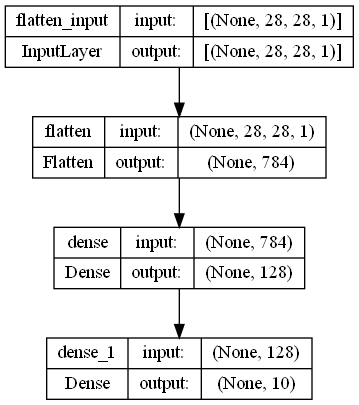

In [3]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4745 - acc: 0.8297 - val_loss: 0.4334 - val_acc: 0.8426
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3569 - acc: 0.8694 - val_loss: 0.3758 - val_acc: 0.8672
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3206 - acc: 0.8818 - val_loss: 0.3635 - val_acc: 0.8684


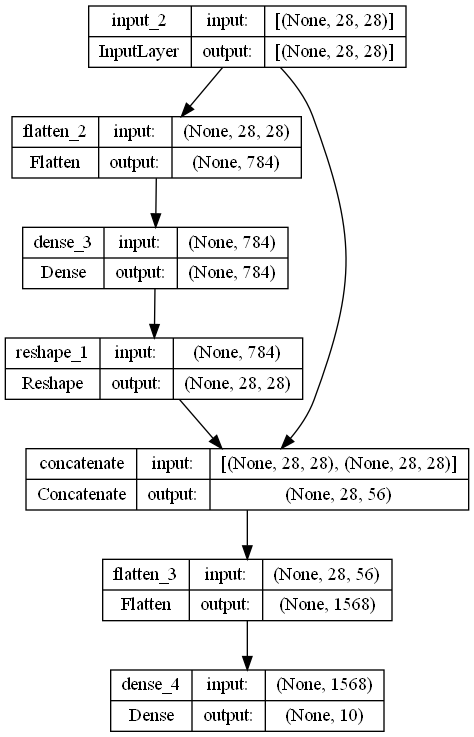

In [5]:
input1=tf.keras.layers.Input(shape=[28,28])
flatten1=tf.keras.layers.Flatten()(input1)
dense1=tf.keras.layers.Dense(28*28,activation='relu')(flatten1)
reshape1=tf.keras.layers.Reshape((28,28))(dense1)

concat1=tf.keras.layers.Concatenate()([input1,reshape1])
flatten2=tf.keras.layers.Flatten()(concat1)
output=tf.keras.layers.Dense(10,activation='softmax')(flatten2)

model=tf.keras.Model(input1,output)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) # 원본레이어 안까먹게..